<a href="https://colab.research.google.com/github/u5638928/u5638928-DataScience-GenAI-Submissions/blob/main/Machine_learning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will start of by loading the data in a data frame. To do this I will use the prompt to AI "load the data set into a data frame" .

In [4]:
import pandas as pd

df = pd.read_csv('/content/loan_data.csv')
display(df.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692.0,5.3,895.0,10820.0,0.0,0.0,0.0,600.0,17.02,0.423,0.023,0.008,1.0
1,33,7.3,43087,627.0,3.5,169.0,16550.0,0.0,1.0,0.0,53300.0,14.10,0.384,1.237,0.412,0.0
2,42,1.1,20840,689.0,8.4,17.0,7852.0,0.0,0.0,0.0,2100.0,18.33,0.377,0.101,0.034,1.0
3,53,0.5,29147,692.0,9.8,1480.0,11603.0,0.0,1.0,0.0,2900.0,18.74,0.398,0.099,0.033,1.0
4,32,12.5,63657,630.0,7.2,209.0,12424.0,0.0,0.0,0.0,99600.0,13.92,0.195,1.565,0.522,1.0


The data frame seems to have been created successfully, now I will check if there is any missing data using the code from "2_05_Exploratory_Data_Analysis.ipynb"


In [5]:
df.isnull().sum()


,0
age,0
years_employed,0
annual_income,0
credit_score,1
credit_history_years,1
savings_assets,1
current_debt,1
defaults_on_file,1
delinquencies_last_2yrs,1
derogatory_marks,1


This is good, there seems to be no missing data.

Now I will try using descriptive statistics to learn a bit more about the data. I will do this by using the code from "2_05_Exploratory_Data_Analysis.ipynb"

In [6]:
df.describe()


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,15171.000000,15171.000000,15171.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000
mean,34.980357,7.405781,50317.616703,643.159525,8.151312,3464.421226,14449.174885,0.052142,0.550890,0.146869,33111.311800,15.484858,0.288169,0.702392,0.234129,0.547264
std,11.123073,7.541397,32794.386363,65.014683,7.193024,12518.016865,13253.134145,0.222321,0.838821,0.413910,25953.704986,4.088222,0.160696,0.464521,0.154848,0.497777
min,18.000000,0.000000,15000.000000,401.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,500.000000,6.020000,0.002000,0.011000,0.004000,0.000000
25%,26.000000,1.300000,27315.500000,599.000000,2.000000,133.000000,5706.000000,0.000000,0.000000,0.000000,12500.000000,12.150000,0.162000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,42020.000000,643.000000,6.100000,570.000000,10563.500000,0.000000,0.000000,0.000000,26300.000000,15.440000,0.267000,0.623000,0.208000,1.000000
75%,43.000000,11.400000,63123.000000,688.000000,12.575000,2286.750000,18821.000000,0.000000,1.000000,0.000000,48500.000000,18.867500,0.391000,1.009000,0.336000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,8.000000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


There are a lot of **variables** within this data, but I will note the most interesting observations. We can see the m

The first step here is to firstly split the y and then scale the x to prevent data leakage.

In [7]:
import pandas as pd

df = pd.read_csv('/content/loan_data.csv')

X = df.drop('loan_status', axis=1)
y = df['loan_status']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (50000, 15)
Shape of y: (50000,)


I now have the x data set and a seperate set for the y variable.

Now, I will apply Min-Max scaling to the features. This is important for normalization, ensuring all features contribute equally to the model's loss function without larger magnitudes dominating.

I will use the AI prompt "Scale the X variables"

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to X and transform X
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame with original column names
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled DataFrame
display(X.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,0.423077,0.431078,0.045017,0.685259,0.176667,0.002983,0.065897,0.0,0.000000,0.0,0.001005,0.648235,0.527569,0.007526,0.007530
1,0.288462,0.182957,0.119519,0.555777,0.116667,0.000563,0.100990,0.0,0.111111,0.0,0.530653,0.476471,0.478697,0.616658,0.615964
2,0.461538,0.027569,0.024851,0.679283,0.280000,0.000057,0.047721,0.0,0.000000,0.0,0.016080,0.725294,0.469925,0.046663,0.046687
3,0.673077,0.012531,0.060200,0.685259,0.326667,0.004933,0.070693,0.0,0.111111,0.0,0.024121,0.749412,0.496241,0.045660,0.045181
4,0.269231,0.313283,0.207051,0.561753,0.240000,0.000697,0.075721,0.0,0.000000,0.0,0.995980,0.465882,0.241855,0.781234,0.781627


That has seemed to run successfully, now all x variables are on a scale from 0-1.

I will now do a train-test split, I will use the prompt "Split X and Y into X_train, X_test,  y_train,  y_test".

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40000, 15)
Shape of X_test: (10000, 15)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


We'll begin with a standard decision tree model WITHOUT adjusting for any hyperparameters

With the data now preprocessed and scaled, I will begin building machine learning models. I'll start with Logistic Regression, which is a strong baseline for binary classification problems. I will use L2 regularization.

I will copy the code from GitHub "4_02_Logistics_Regression.ipynb"

I will have to edit the code as my variable is called 'y_train' not 'Y_train', capitals are important to look out for.

In [10]:
from sklearn.linear_model import LogisticRegression as LogR

# create the model
logR_algo = LogR(penalty='l2')
logR_algo

LogisticRegression()

In [11]:
logR_model = logR_algo.fit(X_train, y_train)
logR_model

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score

# predict the test data
predict = logR_model.predict(X_test)

# seperate the first five predictions and the first five real values in y_test
for i in range(5):
  print(f'Predicted: {round(predict[i],2)}')
  print(f'Real: {y_test.iloc[i]}') # Access by positional index
  print("\n")

print("\n")

print(f'Accuracy: {round(accuracy_score(y_test, predict),2)}') # Corrected Y_test to y_test

Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 1
Real: 1




Accuracy: 0.84


The model achieved an accuracy of 0.84 (or 84%) on the test set. This means that 84% of the time, the model correctly predicted whether a loan would be approved or not. This is a good baseline performance for a Logistic Regression model.


Now I will train a decision tree classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier as DTC

# create the model with hyperparameters
DTC_algo = DTC(max_depth=5, min_samples_split=10)
DTC_algo

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [14]:
DTC_model = DTC_algo.fit(X_train, y_train)
DTC_model


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

The accuracy score is the same as it was for logistic regression, I will check what the decsion tree looks like.

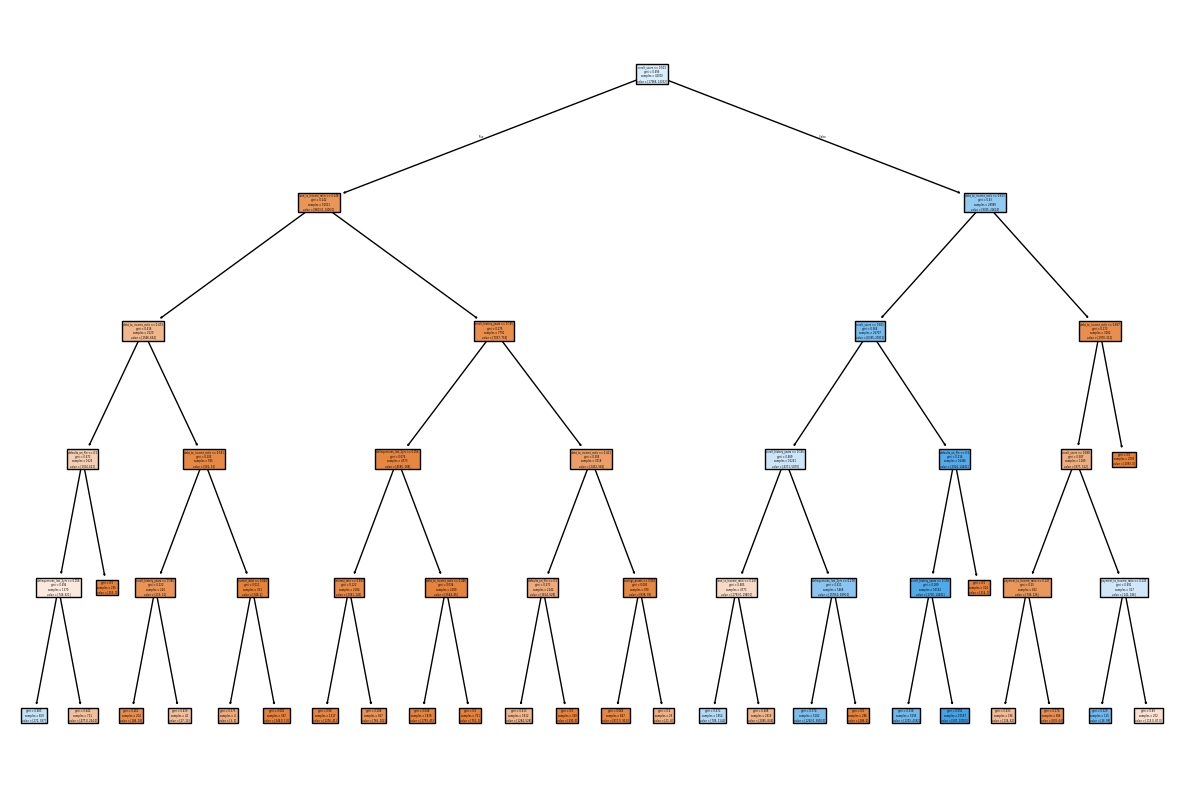

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(DTC_model, filled=True, feature_names=X_train.columns)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# predict the test data
predict = DTC_model.predict(X_test)

# seperate the first five predictions and the first five real values in y_test
for i in range(5):
  print(f'Predicted: {round(predict[i],2)}')
  print(f'Real: {y_test.iloc[i]}') # Changed to .iloc[i] for positional access
  print("\n")

print("\n")

print(f'Accuracy: {round(accuracy_score(y_test, predict),2)}')

Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 1
Real: 1




Accuracy: 0.84


The accuracy score is the same as it was for logistic regression, I will now prepare a confusion matric for this data set with the absence of parameters.

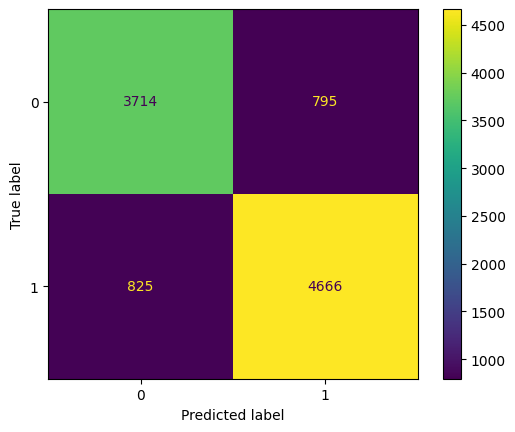

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as CM

# create a confusion matrix
CM.from_predictions(y_test, predict)

In [16]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'max_depth': randint(3, 9),  # Draw from a uniform distribution between 3 and 8 (exclusive of 9)
    'min_samples_split': randint(3, 9) # Draw from a uniform distribution between 3 and 8
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
# n_iter: Number of parameter settings that are sampled
# cv: Number of folds in cross-validation
random_search = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

print("RandomizedSearchCV completed.")
print(f"Best hyperparameters found: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

RandomizedSearchCV completed.
Best hyperparameters found: {'max_depth': 8, 'min_samples_split': 7}
Best score: 0.8634000000000001


The AI has identifies the best max depth to be 8 and the best minimum samples split to be 7. I will now visualse how the decision tree looks to see if it is smaller and less prone to overfitting.

I will now use the AI prompt "visualsie this decision tree with the new hyperperameters"

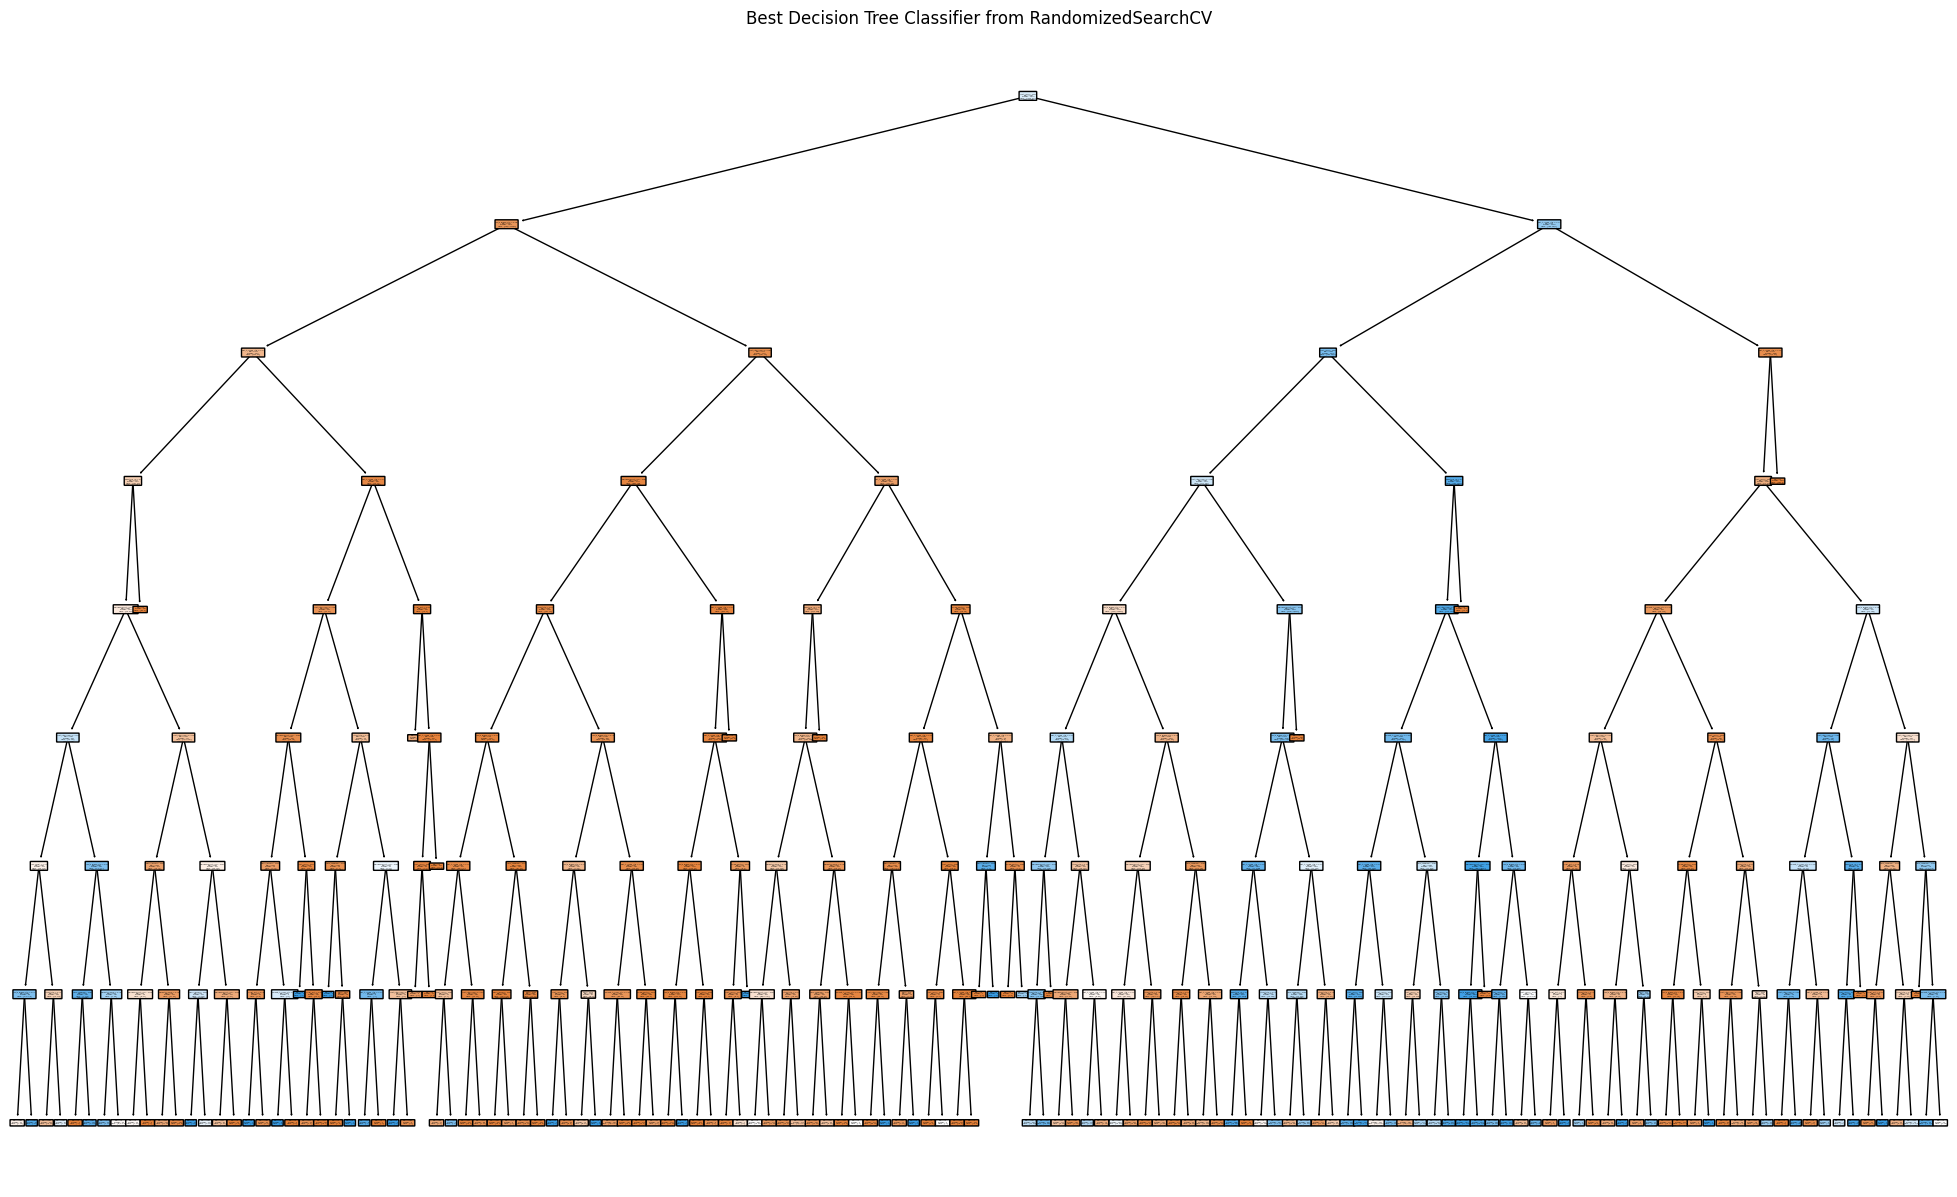

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the best Decision Tree Classifier from RandomizedSearchCV
best_dtc_model = random_search.best_estimator_

plt.figure(figsize=(25, 15)) # Adjust figure size for better readability
plot_tree(best_dtc_model, filled=True, feature_names=X_train.columns, class_names=['Not Default', 'Default'], rounded=True)
plt.title("Best Decision Tree Classifier from RandomizedSearchCV");
plt.show()

I will now test the performance of random forest and GBDT to compare, i have copied the code from the GitHub "/5_01_Random_Forest_and_GBDT.ipynb"

I have had to edit the code as my variables have a lowercase y not an upper case Y.

In [18]:
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from xgboost import XGBClassifier as XGB
from sklearn.metrics import precision_recall_fscore_support

LogR_algo = LogR()
LogR_model = LogR_algo.fit(X_train, y_train)

RF_algo = RF()
RF_model = RF_algo.fit(X_train, y_train)

GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, y_train)

XGB_algo = XGB()
XGB_model = XGB_algo.fit(X_train, y_train)

models = [LogR_model, RF_model, GBDT_model, XGB_model]
names = ['Logistic Regression', 'Random Forest', 'GBDT', 'XGBDT']

for i in range(4):
  print(f"Model: {names[i]}")

  # predict based on training data
  predict = models[i].predict(X_train)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, predict, average='macro')
  print(f"Macro Precision: {precision}")
  print(f"Macro Recall: {recall}")
  print(f"Macro F1-score: {f1_score}")
  print("\n")

Model: Logistic Regression
Macro Precision: 0.8373367262104723
Macro Recall: 0.8343686807693627
Macro F1-score: 0.8355660218246259


Model: Random Forest
Macro Precision: 0.9999721743001837
Macro Recall: 0.9999773057371096
Macro F1-score: 0.9999747393739804


Model: GBDT
Macro Precision: 0.8926150739012277
Macro Recall: 0.8892534116974516
Macro F1-score: 0.890642262178831


Model: XGBDT
Macro Precision: 0.9372780138028503
Macro Recall: 0.9351814870105557
Macro F1-score: 0.9361211983062387




The random forest appears to score perfectly. I will compare it to the Test Data now

I will use the AI prompt "predict on X_test and y_test, calculate accuracy, macro precision, recall, f1-score."

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Re-create the list of models.
# Ensure LogR_model is the tuned one from the previous step (cell 4mxwgZSQS-rB).
# RF_model, GBDT_model, and XGB_model are from cell d8iszy0FWlng.
models_to_evaluate = [
    LogR_model, # This is the tuned Logistic Regression model
    RF_model,   # Untuned Random Forest from d8iszy0FWlng
    GBDT_model, # Untuned GBDT from d8iszy0FWlng
    XGB_model   # Untuned XGBDT from d8iszy0FWlng
]

names_to_evaluate = [
    'Tuned Logistic Regression',
    'Random Forest (Untuned)',
    'GBDT (Untuned)',
    'XGBDT (Untuned)'
]

print("Evaluating models on test data:")
for i in range(len(models_to_evaluate)):
  print(f"\nModel: {names_to_evaluate[i]}")

  # Predict based on test data
  predict_test = models_to_evaluate[i].predict(X_test)

  # Calculate Accuracy
  accuracy = accuracy_score(y_test, predict_test)
  print(f"Accuracy: {round(accuracy, 4)}")

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predict_test, average='macro')
  print(f"Macro Precision: {round(precision, 4)}")
  print(f"Macro Recall: {round(recall, 4)}")
  print(f"Macro F1-score: {round(f1_score, 4)}")

Evaluating models on test data:

Model: Tuned Logistic Regression
Accuracy: 0.8419
Macro Precision: 0.8412
Macro Recall: 0.8388
Macro F1-score: 0.8398

Model: Random Forest (Untuned)
Accuracy: 0.8881
Macro Precision: 0.8875
Macro Recall: 0.8863
Macro F1-score: 0.8868

Model: GBDT (Untuned)
Accuracy: 0.8918
Macro Precision: 0.8924
Macro Recall: 0.8888
Macro F1-score: 0.8903

Model: XGBDT (Untuned)
Accuracy: 0.8917
Macro Precision: 0.8917
Macro Recall: 0.8893
Macro F1-score: 0.8903


Comparing the model performance between the training and unseen test datasets, the GBDT and Logistic Regression models shows the most similar results across both sets, with their Macro Precision metrics being consistently around 89% and 84% retrospectivley. This consistency suggests that these models, are less prone to overfitting

The initial observation that Random Forest achieved a perfect score on the training data strongly suggests that these models are overfitting. While they memorized the training examples flawlessly, their true performance on unseen data is lower, indicating they are not generalizing perfectly.